# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [40]:
# import libraries here

import pandas as pd
import matplotlib.pyplot as plt


# Challenge 1

#### Open the ` Employee.csv` file and name your dataset `employee`

In [3]:
# your answer here
employee = pd.read_csv("data/Employee.csv")

#### What's the mean salary by department. 
##### Tip : There are 2 ways to do it - one way is with and the other way is without pivot tables. Do it both ways. 


In [6]:
# your answer here-1st way
employee.groupby("Department")["Salary"].mean()

Department
HR       45.00
IT       48.75
Sales    55.00
Name: Salary, dtype: float64

In [7]:
# your answer here-2nd way
employee.groupby("Department").agg({"Salary": "mean"})

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


#### We want now to group the data by more than one column. Use Pandas pivot table function to select the mean salary by department and title

In [ ]:
# your answer here
employee_pvt_tbl = pd.pivot_table(
    data=  employee,
    values="Salary",
    index=["Department","Title"],
    aggfunc="mean"
)

employee_pvt_tbl

Salary
Department Title            
HR         VP           70.0
           analyst      32.5
IT         VP           70.0
           analyst      32.5
           associate    60.0
Sales      associate    55.0

#### We want to display the number of years of work experience and the salary for each Title. Add Years as a column in your pivot table
*Hint: Use Pandas doc(see References in README.md) to explore the pivot_table() arguments*

In [14]:
# your answer here
employee_pvt_tbl = pd.pivot_table(
    data=  employee,
    values="Salary",
    index=["Department", "Title", "Years"],
    aggfunc="mean"
)

employee_pvt_tbl

Salary
Department Title     Years        
HR         VP        8        70.0
           analyst   2        30.0
                     4        35.0
IT         VP        8        70.0
           analyst   1        35.0
                     2        30.0
           associate 7        60.0
Sales      associate 2        55.0
                     3        55.0

#### We want to know the information about the mean salary and number of employees in each department and for each job title

In [18]:
# your answer here
employee_pvt_tbl = pd.pivot_table(
    data=employee,
    values="Salary",
    index=["Department", "Title"],
    aggfunc={"Salary": "mean", "Department": "count"}
).rename(columns={"Department": "Count"})

employee_pvt_tbl

Count  Salary
Department Title                   
HR         VP             1    70.0
           analyst        2    32.5
IT         VP             1    70.0
           analyst        2    32.5
           associate      1    60.0
Sales      associate      2    55.0

#### We want to know for each department and for each job title the Salary's median,minimum,maximum and standard deviation. Comment your results

In [22]:
# your answer here
employee_pvt_tbl = pd.pivot_table(
    data=  employee,
    values="Salary",                # Columns
    index=["Department", "Title"],  # index / Rows
    aggfunc=["mean", "max", "median", "min", "std", "count"] # Aggregation Functions
)

employee_pvt_tbl

mean    max median    min       std  count
                     Salary Salary Salary Salary    Salary Salary
Department Title                                                 
HR         VP          70.0     70   70.0     70       NaN      1
           analyst     32.5     35   32.5     30  3.535534      2
IT         VP          70.0     70   70.0     70       NaN      1
           analyst     32.5     35   32.5     30  3.535534      2
           associate   60.0     60   60.0     60       NaN      1
Sales      associate   55.0     55   55.0     55  0.000000      2

#### Based on your comments, fill the missing values with an appropriate value

In [26]:
# your answer here
employee.head(25)
# there are no missing values in the dataset.
# Standard deviations NaN values are due to the fact that there is only one entry for the according category.
# Therefore a standarddeviation cannot be calculated.

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### The stake holders want to know for each department the number of employees and how much money is spend on salaries. Could you provide that information? 

In [28]:
# your answer here
# your answer here
employee_pvt_tbl = pd.pivot_table(
    data=  employee,
    values="Salary",                # Columns
    index=["Department"],  # index / Rows
    aggfunc=["sum", "count"] # Aggregation Functions
)

employee_pvt_tbl

,sum,count
,Salary,Salary
Department,,
HR,135,3
IT,195,4
Sales,110,2


#### For each Department and Title, we want to know the the total years of work experience and the mean salary

In [31]:
# your answer here
# your answer here
employee_pvt_tbl = pd.pivot_table(
    data=  employee,
    values=["Salary", "Years"],                # Columns
    index=["Department", "Title"],  # index / Rows
    aggfunc={"Salary": "mean", "Years": "sum"} # Aggregation Functions
)

employee_pvt_tbl

Salary  Years
Department Title                   
HR         VP           70.0      8
           analyst      32.5      6
IT         VP           70.0      8
           analyst      32.5      3
           associate    60.0      7
Sales      associate    55.0      5

#### Bonus

#### We now want to compute the mean salary after removing the maxima for each Department. Create the appropriate pivot table

#### * Hint: Write a custom function*

In [32]:
# your answer here--Your custom function here
# remove max salary per department
employee_no_max = employee[employee.groupby("Department")["Salary"]
                           .transform(lambda x: x != x.max())]

employee_pvt_tbl = pd.pivot_table(
    data=employee_no_max,
    values="Salary",
    index="Department",
    aggfunc="mean"
)

employee_pvt_tbl

,Salary
Department,
HR,32.500000
IT,41.666667


In [13]:
# your answer here

# Challenge 2

#### Open the ` Fitbit.csv` file and name your dataset `fitbit`

In [35]:
# your answer here
fitbit = pd.read_csv("data/Fitbit.csv")
fitbit

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
0,08-05-2015,1934,905,0.65,0,1.355,46,0,0,1680,384,26,23,417
1,09-05-2015,3631,18925,14.11,4,611.000,316,61,60,2248,454,35,21,491
2,10-05-2015,3204,14228,10.57,1,602.000,226,14,77,1719,387,46,25,436
3,11-05-2015,2673,6756,5.02,8,749.000,190,23,4,9620,311,31,21,350
4,12-05-2015,2495,502,3.73,1,876.000,171,0,0,7360,407,65,44,491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,03-05-2016,3796,18588,14.13,16,599.000,275,49,79,236,377,33,18,410
363,04-05-2016,3525,16382,12.39,16,684.000,333,10,55,2075,406,21,8,427
364,05-05-2016,3649,21913,16.40,19,701.000,287,29,90,2249,280,35,15,315
365,06-05-2016,3539,19023,14.79,15,575.000,298,8,85,2112,370,42,22,412


#### Explore you dataset in terms of data types and descriptive statistics
#### *Hint: Use Pandas functions from previous lectures*

In [37]:
# your answer here
fitbit.info()

fitbit.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    367 non-null    object 
 1   Calorie burned          367 non-null    int64  
 2   Steps                   367 non-null    int64  
 3   Distance                367 non-null    float64
 4   Floors                  367 non-null    int64  
 5   Minutes Sedentary       367 non-null    float64
 6   Minutes Lightly Active  367 non-null    int64  
 7   Minutes Fairly Active   367 non-null    int64  
 8   Minutes Very Active     367 non-null    int64  
 9   Activity Calories       367 non-null    int64  
 10  MinutesOfSleep          367 non-null    int64  
 11  MinutesOfBeingAwake     367 non-null    int64  
 12  NumberOfAwakings        367 non-null    int64  
 13  LengthOfRestInMinutes   367 non-null    int64  
dtypes: float64(2), int64(11), object(1)
memory

,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,2741.501362,10121.588556,8.549128,11.724796,563.934482,236.405995,26.163488,35.722071,2044.147139,290.479564,28.008174,16.196185,321.343324
std,916.307036,5594.836225,3.409881,10.337370,294.793145,86.531376,20.319456,31.006682,2041.267168,154.752328,18.541415,10.757622,170.786726
min,179.000000,0.000000,0.000000,0.000000,1.002000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2698.000000,6730.500000,6.155000,5.000000,520.000000,179.000000,8.000000,10.500000,1218.500000,224.000000,14.000000,7.000000,248.000000
50%,2974.000000,10413.000000,8.290000,11.000000,663.000000,226.000000,24.000000,29.000000,1553.000000,337.000000,29.000000,16.000000,370.000000
75%,3233.000000,13916.500000,10.560000,16.000000,756.500000,290.000000,41.500000,54.000000,1927.500000,400.500000,41.500000,24.000000,440.500000
max,4351.000000,26444.000000,20.450000,101.000000,998.000000,472.000000,101.000000,153.000000,9830.000000,553.000000,78.000000,45.000000,607.000000


In [16]:
# your answer here

#### You suspect that there must be a linear relationship between the Minutes Very Active and the Steps. Compute the correlation between these variables.

In [38]:
# your answer here
cols = ["Minutes Very Active", "Steps"]
fitbit[cols].corr()

,Minutes Very Active,Steps
Minutes Very Active,1.000000,0.571452
Steps,0.571452,1.000000


#### Use matplotlib to visually plot Minutes Very active vs Steps. 

##### Hint : import matplotlib.pyplot as plt (See previous lessons)#####
- Use plt.scatter(x=df['col_name_1'], y=df['col_name_2'])

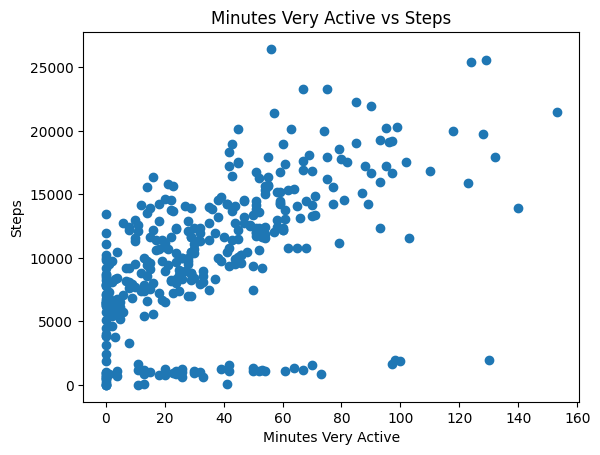

In [42]:
# your answer here

# Scatter plot
plt.scatter(x=fitbit['Minutes Very Active'], y=fitbit['Steps'])

# Add labels and title
plt.xlabel("Minutes Very Active")
plt.ylabel("Steps")
plt.title("Minutes Very Active vs Steps")

# Show the plot
plt.show()

#### What can you say about Minute Very Active and Steps? Write a comment below

In [ ]:
# your comment here
# There seems to be a correlation between the steps done and minutes very active. 
# Probably during the minutes very active the user of the fitbit did more steps than normally
# Although there seem to be a couple outliers who didn't step much - probably because they did another form of sport (bike etc.)

#### We also suspect that there must be a linear relationship between the Minutes Sedentary and the Steps. Compute the correlation between these variables.

In [44]:
# your answer here
cols = ["Minutes Sedentary", "Steps"]
fitbit[cols].corr()

,Minutes Sedentary,Steps
Minutes Sedentary,1.000000,0.076906
Steps,0.076906,1.000000


#### Use matplotlib to visually plot Minutes Sedentary vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

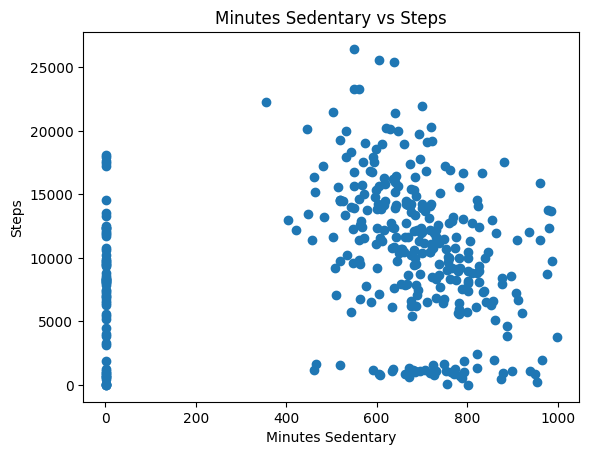

In [46]:
# your answer here
# Scatter plot
plt.scatter(x=fitbit['Minutes Sedentary'], y=fitbit['Steps'])

# Add labels and title
plt.xlabel("Minutes Sedentary")
plt.ylabel("Steps")
plt.title("Minutes Sedentary vs Steps")

# Show the plot
plt.show()

In [ ]:
# Your comment here
# no real correlation. but more minutes sedetary seem to result in slightly lower stepcount

#### We also suspect that there must be a linear relationship between the MinutesOfSleep and the Steps. Compute the correlation between these variables.

In [48]:
# your answer here
cols = ["MinutesOfSleep", "Steps"]
fitbit[cols].corr()

,MinutesOfSleep,Steps
MinutesOfSleep,1.000000,0.130986
Steps,0.130986,1.000000


#### Use matplotlib to visually plot MinutesOfSleep vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

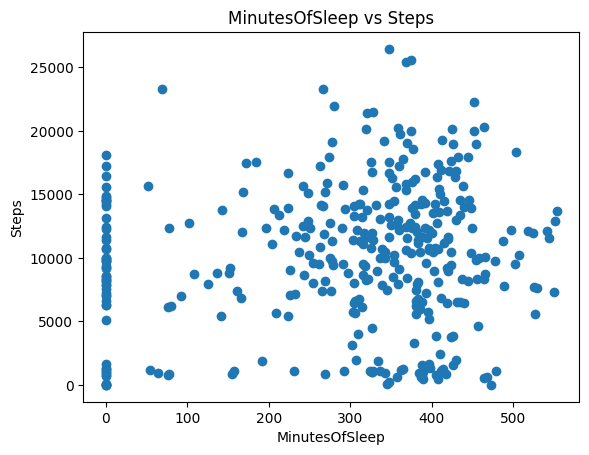

In [49]:
# your answer here
plt.scatter(x=fitbit['MinutesOfSleep'], y=fitbit['Steps'])

# Add labels and title
plt.xlabel("MinutesOfSleep")
plt.ylabel("Steps")
plt.title("MinutesOfSleep vs Steps")

# Show the plot
plt.show()

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']

In [52]:
# your answer here
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']

cor_fit = fitbit[column].corr()


In [54]:
#Print cor_fit
display(cor_fit)

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000


#### Based on the result of the correlation matrix. What are the highly correlated features with the variable Steps?
*Hint: From the results above select the variable Steps and order your results in descending order (use Pandas sort_values function)*

In [ ]:
# your answer here
highly correlated are: 
- Steps & MInutes Very active (0.571452)
- Minutes very active & Floors (0.399503)
- Steps & Floors (0.306511)
- Steps & Calorie Burned (0.255305) 


# Challenge 3

#### Open the `Time_Grades.csv` file and name your dataset `time_grades`

In [55]:
# your answer here

time_grades = pd.read_csv("data/Time_Grades.csv")

In [56]:
#Print time_grades
display(time_grades)

,Name,Study time,Grade
0,Jose,4,4
1,Maria,9,7
2,David,8,9
3,Sonia,10,7
4,Samuel,20,9
5,Eva,5,3
6,Carlos,12,7
7,Pedro,6,5
8,Ana,18,9
9,Gervasio,7,3


#### Show visually the frequency distribution of the time_grades dataset.

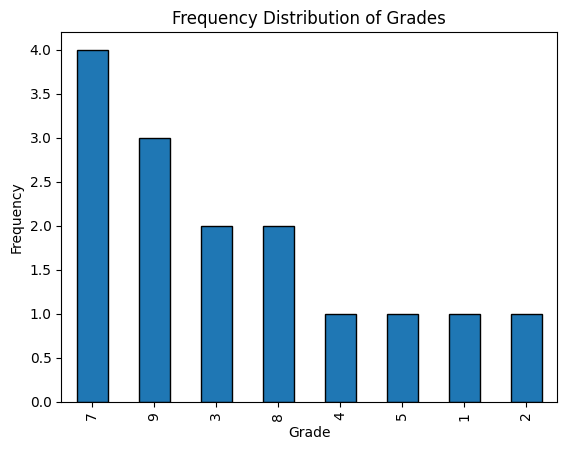

In [59]:
# your answer here

time_grades['Grade'].value_counts().plot(kind='bar', edgecolor='black')

plt.xlabel("Grade")
plt.ylabel("Frequency")
plt.title("Frequency Distribution of Grades")
plt.show()

#### Is there a correaltion between study time and Grade? Use both Pearson and Spearman correlation and comment your results.

In [64]:
# your answer here-Pearson 
column= ['Study time', 'Grade']

cor_fit = time_grades[column].corr(method='pearson')
cor_fit

,Study time,Grade
Study time,1.000000,0.798046
Grade,0.798046,1.000000


In [65]:
## your answer here-Spearman
column= ['Study time', 'Grade']

cor_fit = time_grades[column].corr(method='spearman')
cor_fit

,Study time,Grade
Study time,1.000000,0.819659
Grade,0.819659,1.000000


#### Use matplotlib to visually plot Study time vs Grade. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

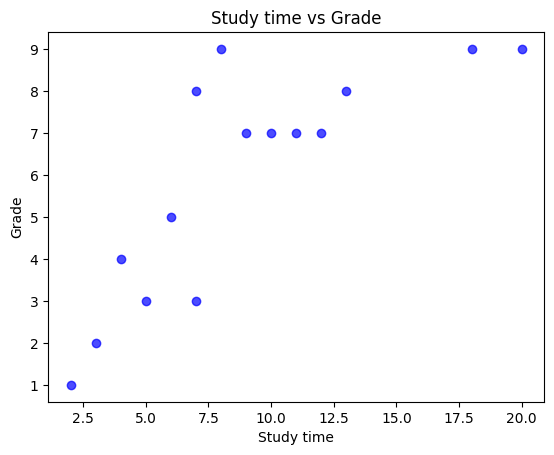

In [66]:
# your answer here

# Scatter plot
plt.scatter(time_grades['Study time'], time_grades['Grade'], color='blue', alpha=0.7)

# Labels and title
plt.xlabel("Study time")
plt.ylabel("Grade")
plt.title("Study time vs Grade")

# Show plot
plt.show()

In [ ]:
#your comment here
"""
The more time spend studying the better the grades.
There is a great correlation between the two variables
"""

#### Could you explain the difference between Pearson and Spearman correlation? (see References in README.md) 

In [ ]:
#your comment here
1. Pearson Correlation
Measures linear relationship between two variables.

2. Spearman Correlation
Measures monotonic relationship using ranks instead of actual values.